# Exploratory Data Analysis of restaurants listed on Swiggy in India
![Swiggy Logo](https://i.imgur.com/S1bgLFY.png)

## Introduction

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

### About the dataset
Swiggy is an Indian online food ordering and delivery platform. Founded in 2014, Swiggy is based in Bangalore and operates in 500+ Indian cities. Besides food delivery, Swiggy also provides on-demand grocery deliveries under the name Instamart, and a same-day package delivery service called Swiggy Genie.

We will download the dataset from [kaggle](https://www.kaggle.com/). Swiggy dataset will help us to analyze the restaurant's data from all over India based on different factors like cuisine, cost, states, regions, reviews, ratings, etc.

This dataset contains 10 different features of each restaurant listed on the website of Swiggy which you can find below

- id - Every restaurant is having a unique ID
- name - Name of the Restaurant
- city - The city where the restaurant is located
- rating - Rating of the Restaurant
- rating_count - Number of People given the Rating
- cost - Cost of eating in that restaurant
- cuisine - Cuisines that restaurant serves
- lic_no - License number of that restaurant
- link - Restaurant link on Swiggy website
- address - Full address of the restaurant

### The Outine of this Project is listed below

1. Downloading a dataset from an online source
2. Data preparation and cleaning with Pandas
3. Open-ended exploratory analysis and visualization
4. Asking and answering interesting questions
5. Summarizing inferences and drawing conclusions

Let's install all the required packages and libraries:-

In [1]:
!pip install opendatasets jovian seaborn plotly --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 103.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import jovian
%matplotlib inline

## Download the dataset

Let's start downloading the dataset from kaggle.

In [3]:
dataset_url = "https://www.kaggle.com/datasets/ashishjangra27/swiggy-restaurants-dataset"

For downloading the dataset using URL we are going to use the `opendatasets` library which you can find [here.](https://pypi.org/project/opendatasets/)

In [4]:
od.download(dataset_url)

100%|██████████| 141M/141M [00:02<00:00, 50.4MB/s]


In [5]:
data_filename='./swiggy-restaurants-dataset/swiggy.csv'

Now let's read the CSV using `pandas` library.

In [6]:
swiggy_df= pd.read_csv(data_filename)

In [7]:
swiggy_df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


## Data Preparation and Cleaning

- remove columns
- drop duplicates
- drop na
- datatype changes
- data error



In [8]:
swiggy_df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

In [9]:
col_selected=['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine']

In [10]:
swiggy_df=swiggy_df[col_selected]

In [11]:
swiggy_df.sample(10)

,id,name,city,rating,rating_count,cost,cuisine
46475,174087,Laxmi Hotel,Daman,3.6,50+ ratings,₹ 200,"Indian,Mughlai"
59781,156117,Dashmesh Tiffin Service,"Rajouri Garden,Delhi",--,Too Few Ratings,₹ 300,"North Indian,Beverages"
108569,499550,Duke Restaurant,"Bandra West,Mumbai",4.1,20+ ratings,₹ 500,"Chinese,Snacks"
10677,527452,JoesBurger,"JP Nagar,Bangalore",--,Too Few Ratings,₹ 300,"American,Continental"
54635,25397,Oven Story Pizza,"Connaught Place,Delhi",3.7,100+ ratings,₹ 400,"Pizzas,Italian"
71367,500594,Shri Maruti Fast Food,Hubli,--,Too Few Ratings,₹ 200,Chinese
144543,387968,Jai mahakali sev usal,"Vadiwadi,Vadodara",--,Too Few Ratings,₹ 150,"Snacks,Beverages"
131632,20692,The Quick Wok,"Baner,Pune",3.9,500+ ratings,₹ 300,"Chinese,Thai"
14279,503940,Indian Curry & Co,"Whitefield,Bangalore",--,Too Few Ratings,₹ 250,"Indian,North Indian"
93750,474546,Benfish,"Central Kolkata,Kolkata",3.5,20+ ratings,₹ 500,"North Indian,Bengali"


ID is a unique identier for each restaurant. Therefore, we will remove the duplicate restaurant IDs from the dataset using
drop_duplicates method of Pandas:

In [12]:
swiggy_df['id'].value_counts().value_counts()

1    148541
Name: id, dtype: int64

In [13]:
swiggy_df = swiggy_df.drop_duplicates('id')

In [14]:
swiggy_df['id'].value_counts().value_counts()

1    148541
Name: id, dtype: int64

Now Let's check for any missing values.

In [15]:
swiggy_df.isna().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
dtype: int64

Drop all the rows which do not have `name`,`cuisine` or `cost`

In [16]:
swiggy_df.dropna(subset = ['name','cuisine','cost'], inplace = True)

In [17]:
swiggy_df

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food"
...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks"
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks"
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental


In [18]:
swiggy_df.isna().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

Now we'll check the datatypes of all the columns

In [19]:
swiggy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148398 entries, 0 to 148540
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148398 non-null  int64 
 1   name          148398 non-null  object
 2   city          148398 non-null  object
 3   rating        148398 non-null  object
 4   rating_count  148398 non-null  object
 5   cost          148398 non-null  object
 6   cuisine       148398 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.1+ MB


- Change `cost` to `int`
- `rating` to `float`
- `rating_count` to `int`
- Create a `city_division` for sub regions within a city.

In [20]:
swiggy_df['rating'] = swiggy_df['rating'].replace('--', '0.0').astype(float)

In [21]:
def rm_rating(row):
  x = row.rating_count.split()[0]
  if 'K+' in x:
    return int(x.replace('K+', ''))*1000
  elif '+' in x:
    return int(x.replace('+', ''))
  else:
    return int(x.replace('Too', '0'))

In [22]:
swiggy_df['rating_count'] = swiggy_df.apply(rm_rating, axis=1)

In [23]:
def rm_rupee_sign(row):
    return row.cost.split()[1]

In [24]:
swiggy_df['cost'] = swiggy_df.apply(rm_rupee_sign, axis=1).astype(int)

In [25]:
def city_div(row):
  city_split = row.city.split(',')
  if len(city_split)>1:
    return city_split[0]
  else:
    return None

def city(row):
  city_split = row.city.split(',')
  if 'goa' in row.city.split('-'):
    return row.city.split('-')[-1]
  else:
    return city_split[-1]

In [26]:
swiggy_df['city_division'] = swiggy_df.apply(city_div, axis=1)
swiggy_df['city'] = swiggy_df.apply(city, axis=1)

In [27]:
swiggy_df['city']

0           Abohar
1           Abohar
2           Abohar
3           Abohar
4           Abohar
            ...   
148536    Yavatmal
148537    Yavatmal
148538    Yavatmal
148539    Yavatmal
148540    Yavatmal
Name: city, Length: 148398, dtype: object

In [28]:
swiggy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148398 entries, 0 to 148540
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             148398 non-null  int64  
 1   name           148398 non-null  object 
 2   city           148398 non-null  object 
 3   rating         148398 non-null  float64
 4   rating_count   148398 non-null  int64  
 5   cost           148398 non-null  int64  
 6   cuisine        148398 non-null  object 
 7   city_division  101639 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 10.2+ MB


In [29]:
swiggy_df

,id,name,city,rating,rating_count,cost,cuisine,city_division
0,567335,AB FOODS POINT,Abohar,0.0,0,200,"Beverages,Pizzas",None
1,531342,Janta Sweet House,Abohar,4.4,50,200,"Sweets,Bakery",None
2,158203,theka coffee desi,Abohar,3.8,100,100,Beverages,None
3,187912,Singh Hut,Abohar,3.7,20,250,"Fast Food,Indian",None
4,543530,GRILL MASTERS,Abohar,0.0,0,250,"Italian-American,Fast Food",None
...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,0.0,0,200,"Fast Food,Snacks",None
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,0.0,0,300,Pizzas,None
148538,559435,Cafe Bella Ciao,Yavatmal,0.0,0,300,"Fast Food,Snacks",None
148539,418989,GRILL ZILLA,Yavatmal,0.0,0,250,Continental,None


In [30]:
swiggy_df.describe()

,id,rating,rating_count,cost
count,148398.000000,148398.000000,148398.000000,148398.000000
mean,363561.017332,1.611930,58.382930,287.605237
std,167877.819222,1.940886,225.204406,796.762559
min,211.000000,0.000000,0.000000,1.000000
25%,233655.250000,0.000000,0.000000,200.000000
50%,412750.500000,0.000000,0.000000,250.000000
75%,502270.250000,3.800000,50.000000,300.000000
max,581031.000000,5.000000,10000.000000,300350.000000


In [31]:
# Above min is showing 1 in cost
print('min cost:',swiggy_df['cost'].min())
print('min cost:',swiggy_df['cost'].max())

min cost: 1
min cost: 300350


In [32]:
swiggy_df[swiggy_df['cost']<50]

,id,name,city,rating,rating_count,cost,cuisine,city_division
508,391689,Cake plaza,Agartala,4.2,100,8,Bakery,None
700,571498,chicken house,Agra,0.0,0,20,"Indian,Biryani",None
942,541486,mann ki chai,Agra,0.0,0,30,Beverages,None
1357,509014,Jugaadi Spot,Ahmedabad,0.0,0,40,Snacks,Vastrapur
1957,547226,Pride King Food Point,Ahmedabad,0.0,0,10,"Street Food,Pizzas",Paldi & Ambawadi
...,...,...,...,...,...,...,...,...
146288,490473,Sri Kanaka Durga restaurant,Vijayawada,0.0,0,1,Snacks,Governorpet
147090,361566,Bhanu Tiffin Center,Vizag,0.0,0,20,"Street Food,South Indian",N A D
147541,478594,Juicecafe,Vizag,3.9,50,30,Beverages,Dwarka Nagar
147954,484600,Juice cafe( tiffins ),Vizag,0.0,0,30,Indian,Dwarka Nagar


In [33]:
swiggy_df['cost'].sort_values(ascending=False)[:10]

70762     300350
21626       8000
47552       6000
47817       5023
107779      5000
4930        3999
109414      3500
23334       3500
76454       3360
75847       3200
Name: cost, dtype: int64

There are restaurants with less than ₹50 cost but have cuisines like bakery, chinese, pizza, etc which is unreal. Let's drop data with less than ₹50 average cost.
About the maximum cost there is a cost which seems incorrect i.e 300350 let's drop that also.

In [34]:
filtered_df = swiggy_df[(swiggy_df['cost']<50) | (swiggy_df['cost']>10000)].index

In [35]:
swiggy_df.drop(filtered_df,inplace=True)

In [36]:
print('min cost:',swiggy_df['cost'].min())
print('min cost:',swiggy_df['cost'].max())

min cost: 50
min cost: 8000


## Perform exploratory analysis & visualization

Columns we'll analyze:
- city
- cost
- rating
- cuisine

### City

In [37]:
cities = swiggy_df.city.unique()
cities

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola', 'Alappuzha',
       'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar', 'Ambala',
       'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar', 'Anand',
       'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh', 'Arrah',
       'Aruppukottai', 'Asansol', 'Aurangabad', 'Aurangabad_bihar',
       'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra', 'Bahadurgarh',
       'Bahraich', 'Balaghat', 'Balangir', 'Balasore', 'Ballari',
       'Balrampur', 'Balurghat', 'Banda', 'Bangalore', 'Bantwal',
       'Bapatlachirala', 'Baramati', 'Baran', 'Bardhaman', 'Bardoli',
       'Bareilly', 'Barmer', 'Barnala', 'Barshi', 'Barwani', 'Basirhat',
       'Basti', 'Batala', 'Bathinda', 'Beawar', 'Beed', 'Begusarai',
       'Bela-pratapgarh', 'Belgaum', 'Berhampore', 'Berhampur', 'Bettiah',
       'Betul', 'Bhadohi', 'Bhadrachalam', 'Bhagalpur', 'Bhandara',
       'Bharabanki', 'Bharat

In [38]:
cities_by_restaurants = swiggy_df.city.value_counts()
cities_by_restaurants

Bangalore     14893
Delhi         14047
Pune          12401
Hyderabad      9987
Chennai        9919
              ...  
Manali            1
Rangpo            1
Hampi             1
Naharlagun        1
Kohima            1
Name: city, Length: 550, dtype: int64

In [39]:
#Top 20 cities
cities_by_restaurants[:20]

Bangalore     14893
Delhi         14047
Pune          12401
Hyderabad      9987
Chennai        9919
Kolkata        8266
Mumbai         6045
Ahmedabad      3509
Chandigarh     3309
Lucknow        2833
Gurgaon        2761
Nagpur         1909
Bikaner        1664
Indore         1642
Noida-1        1422
Surat          1326
Coimbatore     1271
Vijayawada     1127
Vizag          1072
goa             863
Name: city, dtype: int64

In [40]:
#There is a discrepancy in Noida, Let's replace Noida-1 with Noida
swiggy_df['city'] = swiggy_df['city'].replace('Noida-1', 'Noida')

In [41]:
cities = swiggy_df.city.unique()
cities_by_restaurants = swiggy_df.city.value_counts().reset_index().rename({'index':'city', 'city':'Counts'}, axis=1)
cities_by_restaurants[:20]

,city,Counts
0,Bangalore,14893
1,Delhi,14047
2,Pune,12401
3,Hyderabad,9987
4,Chennai,9919
5,Kolkata,8266
6,Mumbai,6045
7,Ahmedabad,3509
8,Chandigarh,3309
9,Lucknow,2833


Now visualize the top 20 cities with most number of restaurants.

In [42]:
hbar=px.bar(cities_by_restaurants[:20], 
           x="Counts", 
           y="city",
           title = 'Number of restaurants in cities')
hbar.update_layout(xaxis_title = 'Number of restaurants',
                  yaxis_title = 'City',
                  width=900,
                  height=600,)
hbar.show()

The above graphs shows that metro cities have the most number of restaurants followed by tourist destinations.

Let's see the density of affordable restaurants

In [43]:
high_resturant_cities = cities_by_restaurants[cities_by_restaurants.Counts>250]
low_resturant_cities = cities_by_restaurants[cities_by_restaurants.Counts<250]

In [44]:
len(high_resturant_cities)/len(cities)

0.10018214936247723

There are only 10% restaurants with average cost above 250

### Cost

Bifurcating the cities with average cost of the total number of restaurants in a city.

In [45]:
cost_by_city = swiggy_df.groupby('city')[['cost']].mean().round(2).reset_index().rename({'index':'city', 'cost':'cost'}, axis=1)
cost_by_city

,city,cost
0,Abohar,231.61
1,Adilabad,216.40
2,Adityapur,242.04
3,Adoni,209.76
4,Agartala,228.23
...,...,...
544,Wardha,232.11
545,Washim,284.00
546,Yamuna-nagar,190.62
547,Yavatmal,210.91


In [46]:
cost_by_city = cost_by_city.sort_values(by = 'cost', ascending=False)
cost_by_city

,city,cost
182,Gangtok,466.67
361,Mussoorie,460.00
548,goa,446.38
142,Darjeeling,406.67
492,Sultanpur,401.37
...,...,...
20,Amreli,152.96
234,Jalaun,150.00
207,Hansi,148.42
214,Hindaun,121.05


Visualising a bar plot for top 10 highest average cost cities

In [47]:
vbar=px.bar(cost_by_city[:10], 
           x="city", 
           y="cost",
           title = 'Top 10 highest average cost cities')
vbar.update_layout(xaxis_title = 'City',
                  yaxis_title = 'Cost',
                  width=900,
                  height=600,)
vbar.show()

The above visulisation refers that tourist desinations have most highest average cost of restaurants.

### Rating

Let's check where the most number of rating lies.

In [48]:
rating = swiggy_df[swiggy_df['rating']>0].rating.sort_values(ascending=False)
rating

22491     5.0
18661     5.0
59687     5.0
78544     5.0
139490    5.0
         ... 
51470     1.2
36120     1.2
67695     1.2
18333     1.1
33821     1.0
Name: rating, Length: 61352, dtype: float64

In [49]:
hist = px.histogram(rating, 
                   x="rating", 
                   marginal="box",
                   nbins=10,
                   title = 'Distribution of ratings')
hist.update_layout(xaxis_title = 'Rating',
                   yaxis_title = 'Count',
                  width=700,
                  height=600,)
hist.show()

Mostly restaurants are rated between 3.8 to 4.2 out of 5 among all the restaurants listed on swiggy.

### Cuisines

Now let's check on different cuisines which are provided by various restaurants across the country.

In [50]:
cuisines=[]
for i in swiggy_df['name'].keys():
  cuisines += swiggy_df.cuisine[i].split(',')

In [51]:
cuisines[:10]

['Beverages',
 'Pizzas',
 'Sweets',
 'Bakery',
 'Beverages',
 'Fast Food',
 'Indian',
 'Italian-American',
 'Fast Food',
 'Continental']

In [54]:
from wordcloud import WordCloud

In [55]:
word_cloud = ' '.join(cuisines)

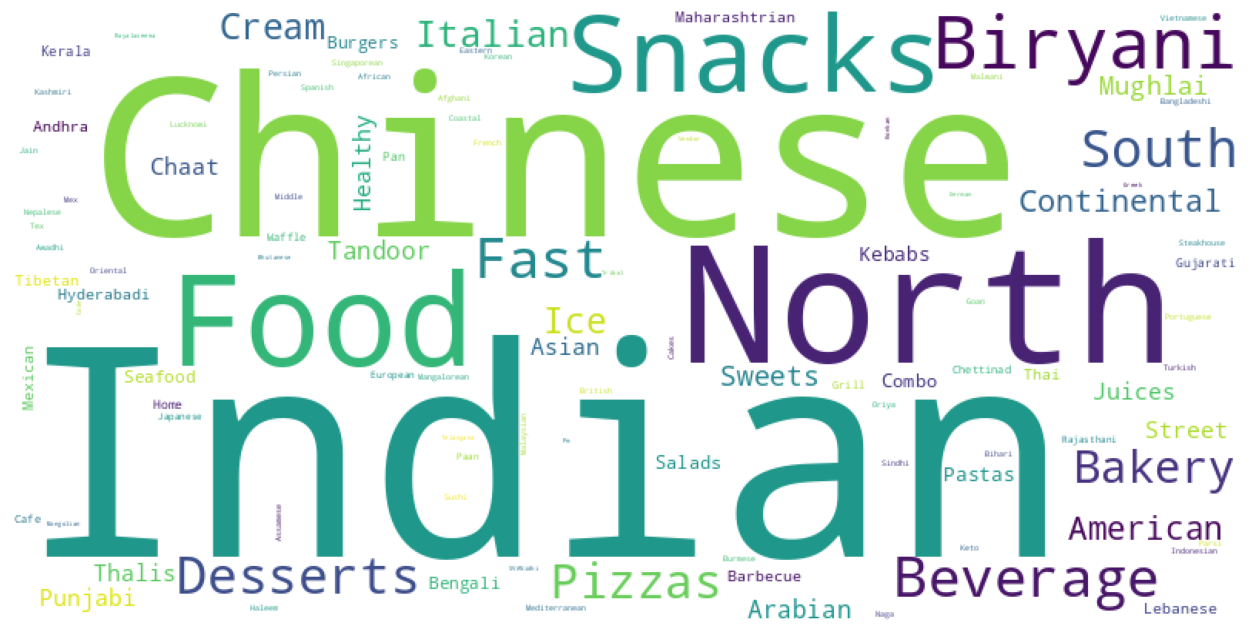

In [56]:
wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(word_cloud)
plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

This world cloud shows mostly restaurants are offering North Indian or chinese food.

## Ask & Answer questions

### Q1. Top 5 most popular restaurant chains in India?.

In [57]:
top_chains = swiggy_df.groupby('name', as_index=False).agg('count')[['name', 'id']].sort_values(by='id', ascending = False)
top_chains = top_chains.reset_index(drop=True).rename(columns={'id':'count'})

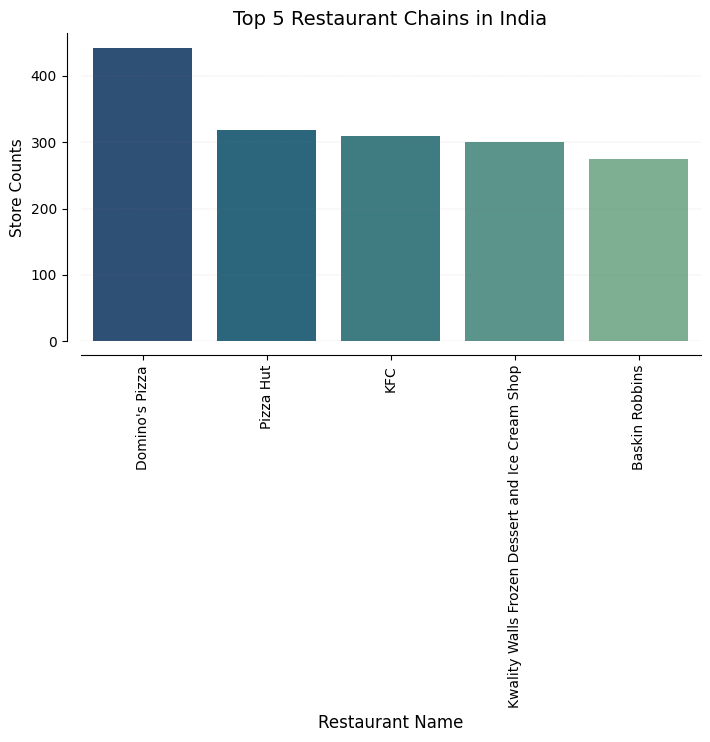

In [58]:

plt.figure(figsize=(8,4))                                       

sns.barplot(data = top_chains.head(5),
           x='name',
           y = 'count',
           palette= "crest_r"
          )     


plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.1
        ) 

plt.grid(False, axis = 'x')                                   

sns.despine(offset=10, trim=False)

plt.xticks(rotation = 90)                                     

plt.xlabel("Restaurant Name", fontsize = 12)   
plt.ylabel("Store Counts", fontsize = 11)
plt.title('Top 5 Restaurant Chains in India', fontsize = 14)
plt.show()

Domino's , Pizza Hut and KFC are the Top 3 resturant chains listed on swiggy.

### Q2. What is the relation of the cost with the rating of the resturant

In [59]:
fig = px.box(swiggy_df.query("rating != 0"),
             x='rating',
             y='cost',
             color='rating',
             template='plotly_dark',
             title='<b>Rating vs Cost')
fig.show()

Most of the high average cost restaurants are rated above 4 rating.

### Q3. Top 10 most common cuisines served by restaurants in India

In [60]:
top_cui = {}
cuisines = list(set(cuisines))
for c in cuisines:
    top_cui[c] = 0

for ci in swiggy_df['cuisine']:
    l = ci.split(',')
    for cs in l:
        top_cui[cs] +=1

Cuisine = pd.DataFrame(list(zip(top_cui.keys(), top_cui.values())),columns =['item', 'Count'])


In [61]:
top_cuisines = Cuisine.sort_values(by='Count',ascending=False)[:10]
fig = px.pie(top_cuisines,
       names='item',
       values='Count',
       labels={'item': 'Cuisine Name',
               'Count':'Cuisine Count'},
       template='plotly_dark',
       color_discrete_sequence=px.colors.sequential.Plasma,
       hole=.5,
       title='<b> Most Common Cuisines served by restaurants <b>'
      )

fig.show()

North Indian and Chinese cuisines dominates the mostly served cuisines in a resturant.

### Q4. What is the count of restaurants with respect to ratings.

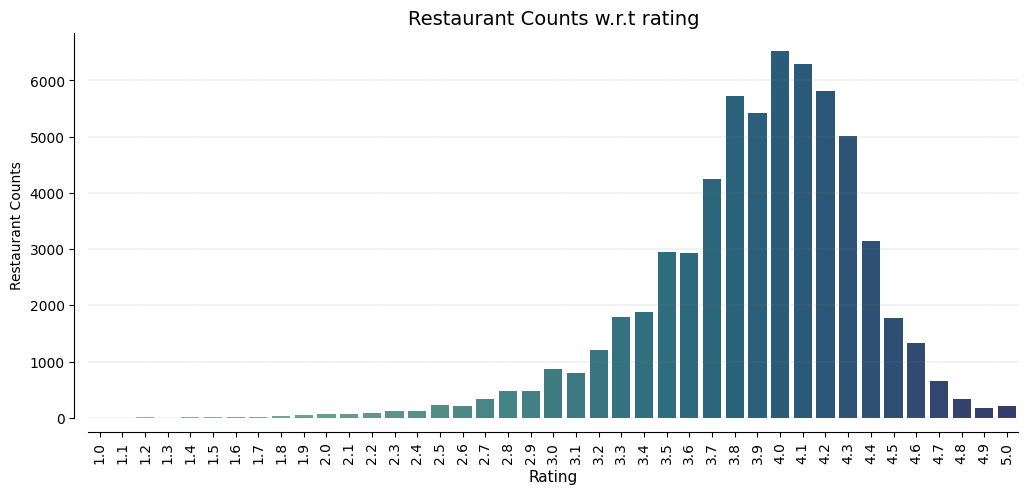

In [62]:
rating_data = swiggy_df.groupby('rating', as_index = False).agg('count')[['rating','name']]

plt.figure(figsize=(12,5))   

sns.barplot(rating_data.query("rating != 0"),
           x='rating',
           y = 'name',
           palette= "crest"
          )     

plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',
         linewidth=0.2
        ) 

plt.grid(False, axis = 'x')
sns.despine(offset=10, trim=False)
plt.xticks(rotation = 90)                                     

plt.xlabel("Rating", fontsize = 11)                                         
plt.ylabel("Restaurant Counts", fontsize = 10)                     
plt.title('Restaurant Counts w.r.t rating', fontsize = 14)         
plt.show()

Mostly restaurants are rated between 3.8 to 4.2 out of 5 among all the restaurants listed on swiggy.

### Q5.  How many Restaurant's lies between 1.1-2.0, 2.1-3.0, 3.1-4.0, 4.1-5.0 ratings

In [63]:
rating_groups = swiggy_df.groupby('rating', as_index = False).agg('count').rename({'name':'R_Counts'}, axis=1)[['rating','R_Counts']]

rating_groups = {
    '1.1-2.0':rating_groups[(rating_groups['rating']>1.0) & (rating_groups['rating']<=2.0)].R_Counts.sum(),
    '2.1-3.0':rating_groups[(rating_groups['rating']>2.0) & (rating_groups['rating']<=3.0)].R_Counts.sum(),
    '3.1-4.0':rating_groups[(rating_groups['rating']>3.0) & (rating_groups['rating']<=4.0)].R_Counts.sum(),
    '4.1-5.0':rating_groups[(rating_groups['rating']>4.0) & (rating_groups['rating']<=5.0)].R_Counts.sum()
    }

rating_groups = pd.DataFrame((rating_groups.keys(),rating_groups.values()), index=['Rating', 'Counts']).T

In [64]:
fig = px.pie(rating_groups,
       names='Rating',
       values='Counts',
       labels={'Counts':'Restaurant Counts'},
       template='plotly_dark',
       color_discrete_sequence=px.colors.sequential.Plasma,
       hole=.5,
       title='<b> Restaurants Counts as per Rating<b>'
      )

fig.show()

Only 5% of restaurants are rated below 3.1 rating.

### Q6. Number of cities with least number of restaurants listed?

In [65]:
Bottom = swiggy_df.city.value_counts(ascending=True).reset_index().rename({'index':'city', 'city':'Counts'}, axis=1)

Bottom.sort_values(by='Counts')[:5]

,city,Counts
0,Naharlagun,1
1,Hampi,1
2,Manali,1
3,Rangpo,1
4,Kohima,1


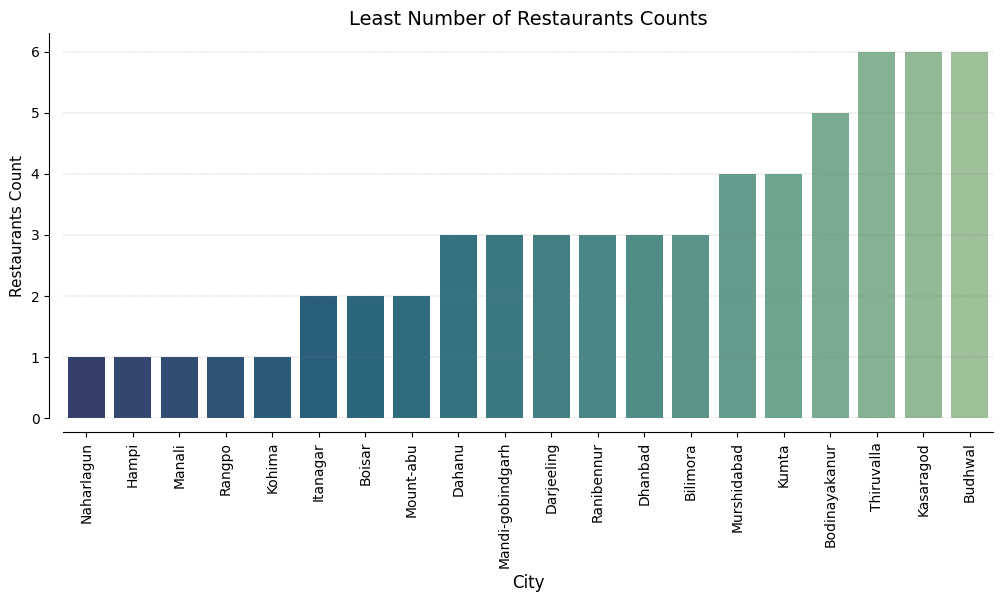

In [66]:
plt.figure(figsize=(12,5))                                       

sns.barplot(data = Bottom.head(20),
           x='city',
           y ='Counts',
           palette= "crest_r"
          )     

plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 

plt.grid(False, axis = 'x')                                   

sns.despine(offset=10, trim=False)

plt.xticks(rotation = 90)                                     

plt.xlabel("City", fontsize = 12)                                                       
plt.ylabel("Restaurants Count", fontsize = 11)                                  
plt.title('Least Number of Restaurants Counts', fontsize = 14)        
plt.show()

Low populated cities have lowest resturants listed.

### Q7. Top 10 cities as per the number of restaurants listed?

In [67]:
Top = cities_by_restaurants.head(10)

fig =px.bar(Top,
            x= 'city',
            y= 'Counts',
            labels = {'Counts':'Restaurants Counts'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.G10_r,
            title='<b>Top 10 Cities w.r.t Restaurants listed')

fig.show()

The above graphs shows that metro cities have the most number of restaurants

### Q8. The Sub-Divison of Delhi with the maximum number of restaurants listed on Swiggy?

In [68]:
delhi_sub=swiggy_df[swiggy_df.city == 'Delhi'].groupby('city_division')['name'].count().sort_values(ascending=False).reset_index(name='Restaurants counts')
delhi_sub.head().style.background_gradient()

,city_division,Restaurants counts
0,Indirapuram,1278
1,Rohini,1131
2,Greater Kailash 2,1037
3,Laxmi Nagar,930
4,Malviya Nagar,898


In [69]:
fig =px.bar(delhi_sub.head(20),
            x= 'city_division',
            y= 'Restaurants counts',
            labels = {'city_division':'Top 20 City','Restaurants counts':'Restaurants Counts'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.G10_r,
            title='<b>Top 20 Subregion of Delhi in terms of Restaurants Counts')

fig.show()

The above graphs shows the distribution of number of restaurants within Delhi

### Q9. The Top 5 most Expensive cities in the Dataset?

In [70]:
Expensive = swiggy_df.groupby('city', as_index=False).agg('mean')[['city','cost']].sort_values(by='cost', ascending = False)

fig =px.bar(Expensive.head(),
            x= 'city',
            y= 'cost',
            labels = {'city':'Top 5 City','cost':'Cost'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.G10_r,
            title='<b>Most Expensive City')

fig.show()


<ipython-input-70-338795e0971c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



The above visulisation refers that tourist desinations have most highest average cost of restaurants.

### Q10. The Top 5 least expensive cities in the Dataset?

In [71]:
Cheap = swiggy_df.groupby('city', as_index=False).agg('mean')[['city','cost']].sort_values(by='cost')

fig =px.bar(Cheap.head(),
            x= 'city',
            y= 'cost',
            labels = {'city':'Top 5 City','cost':'Cost'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.G10_r,
            title='<b>Least Expensive City')

fig.show()

<ipython-input-71-7d49b069ca54>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## Conclusion

- Only 10% of the restaurants have average cost more than ₹250.
- Highest number of Restaurants is in Bangalore.
- The Highest number of Restaurants in Delhi subregion is in Indirapuram.
- 55% of the Restaurants rating is in between 3.1 - 4.0.
- There are 209 Restaurants, which has the maximum 5.0 rating
- There are 5 cities where only one restaurants listed.
- Chinese is the most popular Cuisines.
- The most expensive city as per restaurants average cost is Gangtok,
- The least expensive City as per restaurants average cost is Hampi

## Future Work

- Analyze the food menu data to get better understanding of average cost and cuisines.
- Understand the cuisines loved more around a specific region or city.
- Analyze cloud kitchens established in a city.

## References

- Pandas - https://pandas.pydata.org/
- Kaggle open datasets - https://www.kaggle.com/datasets
- Matplotlib - https://plotly.com/python/v3/matplotlib-colorscales/
- Seaborn - https://seaborn.pydata.org/